# Data Understanding and Tokenization

# Load of datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
directory = '/content/drive/My Drive/PhD_Work/Projects/LT-EDI_2022/Data_HomoTransphobia'

In [ ]:
# imports 
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd

In [ ]:
# readings of the .tsv files
train = pd.read_csv(directory+"/eng_3_train.tsv",sep='\t')
dev = pd.read_csv(directory+"/eng_3_dev.tsv", sep="\t")
en = pd.concat([train, dev], ignore_index=True)

# Data Understanding (of Train and Dev sets)

## General semantics

In [ ]:
# visualization of the first 5 records, for example
en = en[['category','text']]
en.head()

,category,text
0,Non-anti-LGBT+ content,"I support her, very smart ponnu"
1,Homophobic,priyadharshini kannan same gender attraction ...
2,Non-anti-LGBT+ content,Bro u name and phone number (or)mobile number ...
3,Non-anti-LGBT+ content,experience Thaks bro I love you so much bro
4,Non-anti-LGBT+ content,world is becoming bad day by day....


In [ ]:
# generic information about the data such as attributes' names, types and size
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3956 non-null   object
 1   text      3953 non-null   object
dtypes: object(2)
memory usage: 61.9+ KB


## Data quality (missing values, outliers, mispelled words) 

In [ ]:
# checking for all columns if they contain any missing values
en.isnull().any()

category    False
text         True
dtype: bool

In [ ]:
# automatic sum of the missing values for every column 
en.isnull().sum()

category    0
text        3
dtype: int64

In [ ]:
en = en.dropna()
en.isnull().sum()

In [ ]:
df = en

## Distribution of the variables and categories' statistics 

In [ ]:
en['category'].value_counts()

Non-anti-LGBT+ content    3730
Homophobic                 215
Transphobic                  8
Name: category, dtype: int64

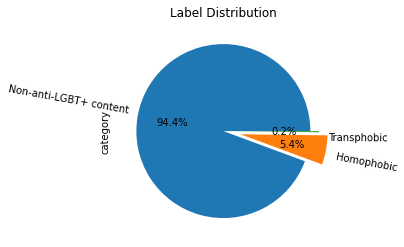

In [ ]:
# pie chart label distribution 
en['category'].value_counts().plot(kind='pie', 
                                   title='Label Distribution',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.2, 0.1), 
                                   rotatelabels =True)
plt.show()

Text(0.5, 1.0, 'Label Distribution')

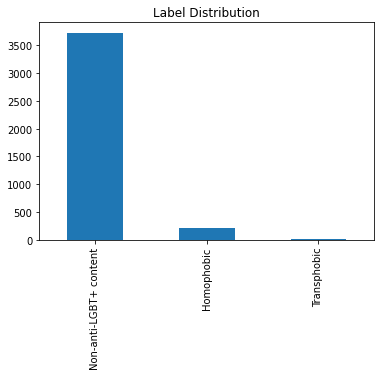

In [ ]:
en['category'].value_counts().plot(kind='bar', stacked=True)
plt.title('Label Distribution')

## Linguistic Analysis for the whole dataset

In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Why', 'WRB'),
 ('why', 'WRB'),
 ('How', 'WRB'),
 ('When', 'WRB'),
 ('Where', 'WRB'),
 ('how', 'WRB'),
 ('Whenever', 'WRB'),
 ('where', 'WRB'),
 ('What', 'WP'),
 ('Who', 'WP'),
 ('what', 'WP'),
 ('who', 'WP'),
 ('Is', 'VBZ'),
 ('is', 'VBZ'),
 ('Am', 'VBP'),
 ('do', 'VBP'),
 ('Do', 'VBP'),
 ('Unwanted', 'VBN'),
 ('Scripted', 'VBN'),
 ('Talented', 'VBN'),
 ('Loved', 'VBN'),
 ('Liked', 'VBN'),
 ('Expected', 'VBN'),
 ('Come', 'VBN'),
 ('subscribed', 'VBN'),
 ('Acting', 'VBG'),
 ('Waiting', 'VBG'),
 ('Amazing', 'VBG'),
 ('Reaching', 'VBG'),
 ('According', 'VBG'),
 ('Accepting', 'VBG'),
 ('Being', 'VBG'),
 ('Planning', 'VBG'),
 ('Encouraging', 'VBG'),
 ('waiting', 'VBG'),
 ('Looking', 'VBG'),
 ('Giving', 'VBG'),
 ('Getting', 'VBG'),
 ('Misleading', 'VBG'),
 ('Touching', 'VBG')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 8114 samples and 77125 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 5053),
 (' ', 3953),
 ('.', 2202),
 ('...', 1320),
 ('to', 1255),
 ('is', 1218),
 ('the', 1126),
 ('and', 1042),
 ('I', 986),
 ('a', 913),
 ('..', 753),
 ('you', 691),
 ('of', 688),
 ('in', 659),
 ('this', 649),
 ('for', 623),
 ('are', 517),
 ('not', 490),
 ('u', 459),
 ('it', 438),
 ('?', 425),
 ('!', 416),
 ('that', 407),
 ('bro', 388),
 ('like', 346),
 ('be', 345),
 ('so', 329),
 ('they', 321),
 ('your', 305),
 ('love', 295),
 ('about', 291),
 ('all', 290),
 ('have', 287),
 ('with', 286),
 ('my', 285),
 ('will', 285),
 ('❤', 280),
 ('️', 268),
 ('people', 260),
 ('but', 255)]

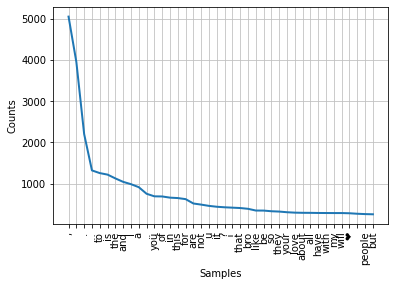

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 7950 samples and 45625 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 3953),
 ('I', 986),
 ('..', 753),
 ('u', 459),
 ('bro', 388),
 ('like', 346),
 ('love', 295),
 ('❤', 280),
 ('️', 268),
 ('people', 260),
 ('good', 236),
 (';', 220),
 ('movie', 204),
 ('life', 201),
 ('video', 195),
 ('one', 178),
 ('😍', 176),
 ('gay', 175),
 ('really', 166),
 ('She', 153),
 ('ur', 147),
 ('🙏', 146),
 ('great', 143),
 ('r', 142),
 ('Bro', 134),
 ('👍', 131),
 ('also', 129),
 ('know', 123),
 ('think', 119),
 ('Really', 115),
 ('super', 115),
 ('want', 111),
 ('support', 110),
 ('God', 110),
 ('This', 110),
 ('best', 108),
 ('society', 108),
 ('2', 106),
 ('transgender', 104),
 ('nice', 104)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


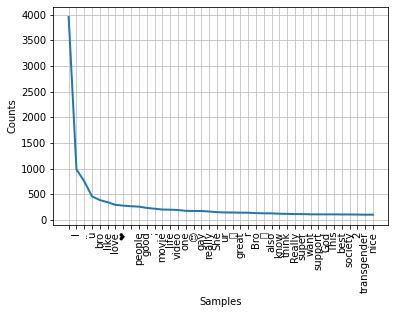

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

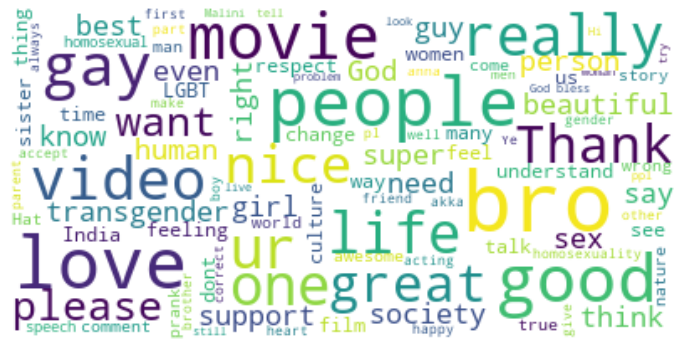

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

31
['#nice', '#mobiicuts', '#lol', '#intersteller', '#love', '#tmp', '#respect', '#mysonisgay', '#interstellar', '#getbacksection377', '#saynotohomosexuality', '#', '#obeytrans', '#loveislove', '#', '#', '#', '#', '#animators', '#', '#keepgoing', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']


In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

16


[('#', 16),
 ('#nice', 1),
 ('#mobiicuts', 1),
 ('#lol', 1),
 ('#intersteller', 1),
 ('#love', 1),
 ('#tmp', 1),
 ('#respect', 1),
 ('#mysonisgay', 1),
 ('#interstellar', 1),
 ('#getbacksection377', 1),
 ('#saynotohomosexuality', 1),
 ('#obeytrans', 1),
 ('#loveislove', 1),
 ('#animators', 1),
 ('#keepgoing', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['nice',
 'mob i cut s',
 'lo l',
 'inter stell er',
 'love',
 't m p',
 'respect',
 'my son is gay',
 'interstellar',
 'get back section 377',
 'say not oho mo sexuality',
 '#',
 'obey tra n s',
 'love is',
 'animator s',
 'keep going']

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

0
[]


In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[]

## Linguistic Analysis per category 'Non-anti-LGBT+ content'


In [ ]:
en = df.loc[df['category'] == 'Non-anti-LGBT+ content']
en

,category,text
0,Non-anti-LGBT+ content,"I support her, very smart ponnu"
2,Non-anti-LGBT+ content,Bro u name and phone number (or)mobile number ...
3,Non-anti-LGBT+ content,experience Thaks bro I love you so much bro
4,Non-anti-LGBT+ content,world is becoming bad day by day....
5,Non-anti-LGBT+ content,Plz upload part 2 soon
...,...,...
3951,Non-anti-LGBT+ content,"Hi ma, I am a mother of 2 kids ma, I support H..."
3952,Non-anti-LGBT+ content,Behavior is very cheaper. Recently I travelled...
3953,Non-anti-LGBT+ content,Boomi Raja then u should never watch this my d...
3954,Non-anti-LGBT+ content,Fables movie mind blowing


In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Why', 'WRB'),
 ('why', 'WRB'),
 ('How', 'WRB'),
 ('When', 'WRB'),
 ('Where', 'WRB'),
 ('how', 'WRB'),
 ('Whenever', 'WRB'),
 ('where', 'WRB'),
 ('What', 'WP'),
 ('Who', 'WP'),
 ('what', 'WP'),
 ('who', 'WP'),
 ('Is', 'VBZ'),
 ('is', 'VBZ'),
 ('Am', 'VBP'),
 ('do', 'VBP'),
 ('Do', 'VBP'),
 ('Unwanted', 'VBN'),
 ('Scripted', 'VBN'),
 ('Talented', 'VBN'),
 ('Loved', 'VBN'),
 ('Liked', 'VBN'),
 ('Expected', 'VBN'),
 ('Come', 'VBN'),
 ('subscribed', 'VBN'),
 ('Acting', 'VBG'),
 ('Waiting', 'VBG'),
 ('Amazing', 'VBG'),
 ('Reaching', 'VBG'),
 ('Accepting', 'VBG'),
 ('According', 'VBG'),
 ('Being', 'VBG'),
 ('Planning', 'VBG'),
 ('Encouraging', 'VBG'),
 ('waiting', 'VBG'),
 ('Looking', 'VBG'),
 ('Giving', 'VBG'),
 ('Getting', 'VBG'),
 ('Misleading', 'VBG'),
 ('Touching', 'VBG')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 7537 samples and 69662 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 4675),
 (' ', 3730),
 ('.', 1998),
 ('...', 1186),
 ('to', 1098),
 ('is', 1054),
 ('the', 972),
 ('I', 921),
 ('and', 899),
 ('a', 829),
 ('..', 678),
 ('you', 625),
 ('of', 605),
 ('in', 582),
 ('for', 569),
 ('this', 562),
 ('are', 447),
 ('u', 424),
 ('not', 387),
 ('it', 385),
 ('bro', 384),
 ('!', 379),
 ('?', 378),
 ('that', 360),
 ('so', 308),
 ('like', 302),
 ('be', 291),
 ('love', 283),
 ('❤', 280),
 ('they', 274),
 ('your', 266),
 ('about', 265),
 ('️', 265),
 ('my', 264),
 ('all', 264),
 ('have', 253),
 ('with', 235),
 ('good', 225),
 ('will', 223),
 ('people', 223)]

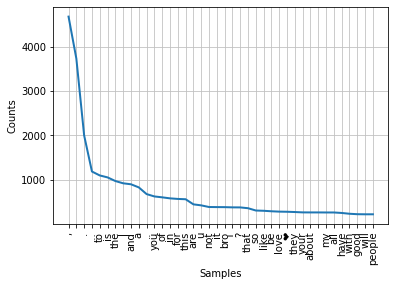

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 7375 samples and 41651 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 3730),
 ('I', 921),
 ('..', 678),
 ('u', 424),
 ('bro', 384),
 ('like', 302),
 ('love', 283),
 ('❤', 280),
 ('️', 265),
 ('good', 225),
 ('people', 223),
 ('movie', 201),
 ('video', 192),
 ('life', 188),
 ('😍', 176),
 (';', 171),
 ('really', 165),
 ('one', 157),
 ('gay', 154),
 ('She', 148),
 ('🙏', 143),
 ('great', 141),
 ('ur', 133),
 ('👍', 131),
 ('r', 131),
 ('Bro', 129),
 ('also', 115),
 ('super', 113),
 ('Really', 113),
 ('know', 108),
 ('best', 107),
 ('think', 106),
 ('2', 105),
 ('support', 102),
 ('nice', 102),
 ('want', 102),
 ('please', 99),
 ('part', 99),
 ('transgender', 98),
 ('society', 98)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


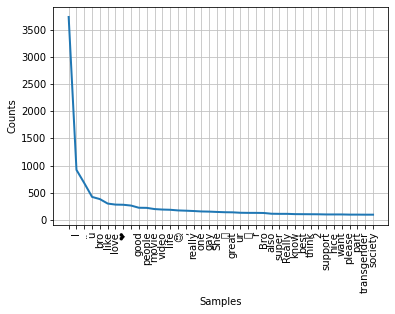

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

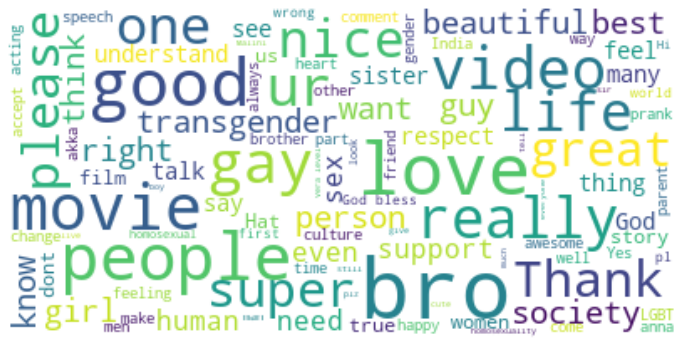

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

23
['#nice', '#mobiicuts', '#lol', '#intersteller', '#love', '#tmp', '#respect', '#mysonisgay', '#interstellar', '#', '#obeytrans', '#loveislove', '#', '#', '#', '#', '#animators', '#', '#keepgoing', '#', '#', '#', '#']


In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

14


[('#', 10),
 ('#nice', 1),
 ('#mobiicuts', 1),
 ('#lol', 1),
 ('#intersteller', 1),
 ('#love', 1),
 ('#tmp', 1),
 ('#respect', 1),
 ('#mysonisgay', 1),
 ('#interstellar', 1),
 ('#obeytrans', 1),
 ('#loveislove', 1),
 ('#animators', 1),
 ('#keepgoing', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['nice',
 'mob i cut s',
 'lo l',
 'inter stell er',
 'love',
 't m p',
 'respect',
 'my son is gay',
 'interstellar',
 '#',
 'obey tra n s',
 'love is',
 'animator s',
 'keep going']

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

0
[]


In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[]

## Linguistic Analysis per category 'Homophobic'


In [ ]:
en = df.loc[df['category'] == 'Homophobic']
en

,category,text
1,Homophobic,priyadharshini kannan same gender attraction ...
22,Homophobic,Really excellent movie....I feel that no one a...
31,Homophobic,Madam read bible
94,Homophobic,it's due to abnormalities present sexual dimor...
96,Homophobic,i think u too gay....thats y u telling with t...
...,...,...
3825,Homophobic,Think about one generation where no male wants...
3835,Homophobic,Shoot it now
3859,Homophobic,After 55 of your age you will realize why this...
3892,Homophobic,Kadhayalla Nijam Male and female combination ...


In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Who', 'WP'),
 ('What', 'WP'),
 ('According', 'VBG'),
 ('Get', 'VB'),
 ('Go', 'VB'),
 ('let', 'VB'),
 ('Let', 'VB'),
 ('Think', 'VB'),
 ('Yes', 'UH'),
 ('More', 'RBR'),
 ('Really', 'RB'),
 ('Just', 'RB'),
 ('Regardless', 'RB'),
 ('Even', 'RB'),
 ('Very', 'RB'),
 ('Only', 'RB'),
 ('Now', 'RB'),
 ('Too', 'RB'),
 ('very', 'RB'),
 ('Soon', 'RB'),
 ('first', 'RB'),
 ('only', 'RB'),
 ('Its', 'PRP$'),
 ('They', 'PRP'),
 ('I', 'PRP'),
 ('We', 'PRP'),
 ('It', 'PRP'),
 ('She', 'PRP'),
 ('we', 'PRP'),
 ('it', 'PRP'),
 ('You', 'PRP'),
 ("it's", 'NNS'),
 ('People', 'NNS'),
 ('Aids', 'NNS'),
 ('vives', 'NNS'),
 ('Cats', 'NNS'),
 ('Madam', 'NNP'),
 ('Homosexuality', 'NNP'),
 ("It's", 'NNP'),
 ('Ur', 'NNP')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 1753 samples and 7208 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 368),
 (' ', 215),
 ('.', 198),
 ('is', 161),
 ('to', 152),
 ('the', 151),
 ('and', 142),
 ('...', 118),
 ('not', 99),
 ('this', 85),
 ('of', 83),
 ('in', 77),
 ('a', 77),
 ('..', 75),
 ('are', 67),
 ('you', 66),
 ('will', 62),
 ('I', 56),
 ('be', 53),
 ('it', 52),
 ('with', 51),
 ('for', 48),
 (';', 48),
 ('?', 47),
 ('that', 46),
 ('like', 44),
 ('they', 43),
 ('your', 39),
 ('!', 37),
 ('people', 37),
 ('u', 33),
 ('have', 33),
 ('should', 31),
 ('or', 31),
 ('but', 30),
 ('their', 29),
 ('we', 29),
 ('God', 28),
 ('if', 28),
 ('against', 28)]

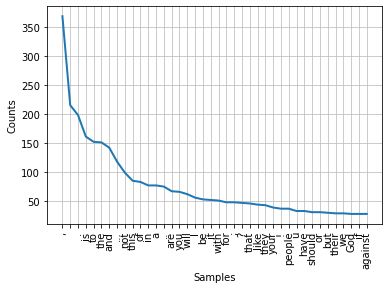

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 1616 samples and 3834 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 215),
 ('..', 75),
 ('I', 56),
 (';', 48),
 ('like', 44),
 ('people', 37),
 ('u', 33),
 ('God', 28),
 ('nature', 27),
 ('sex', 22),
 ('gay', 21),
 ('wrong', 20),
 ('This', 19),
 ('one', 18),
 ('culture', 16),
 ('If', 16),
 ('man', 15),
 ('know', 15),
 ('ur', 14),
 ('We', 14),
 ('think', 13),
 ('world', 13),
 ('get', 13),
 ('also', 13),
 ('life', 13),
 ('&', 13),
 ('love', 12),
 ('But', 12),
 ('created', 12),
 ('They', 12),
 ('LGBT', 11),
 ('good', 11),
 ('The', 11),
 ('judgement', 11),
 ('go', 11),
 ('homosexuality', 11),
 ('human', 11),
 ('animals', 11),
 ('natural', 11),
 ('r', 11)]

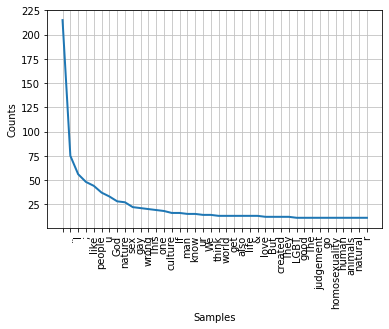

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

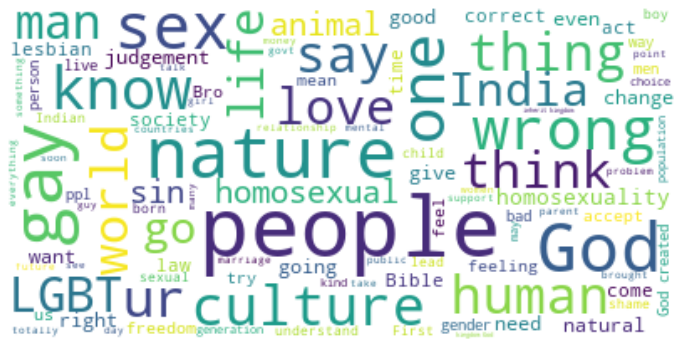

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

8
['#getbacksection377', '#saynotohomosexuality', '#', '#', '#', '#', '#', '#']


In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

3


[('#', 6), ('#getbacksection377', 1), ('#saynotohomosexuality', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['get back section 377', 'say not oho mo sexuality', '#']

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

0
[]


In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[]

## Linguistic Analysis per category 'Transphobic'


In [ ]:
en = df.loc[df['category'] == 'Transphobic']
en

,category,text
401,Transphobic,Sex the 9.
1090,Transphobic,Magalakshmi Mukunthan Ella transgalayum konnud...
1340,Transphobic,Today also one transgender scolded me for not ...
1418,Transphobic,Rajeswari Rajagopalan ; Sister....last week fo...
2331,Transphobic,Hey seriously I thought She was a Transgender
2766,Transphobic,Every transenter says they are doing prostitui...
3569,Transphobic,Body is female... But brain is male... Genetic...
3830,Transphobic,U tried to prank a normal girl but unfortunate...


In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Magalakshmi', 'NNP'),
 ('Rajeswari', 'NNP'),
 ('Hey', 'NNP'),
 ('U', 'NNP'),
 ('Sex', 'NN'),
 ('Today', 'NN'),
 ('Body', 'NN'),
 ('Every', 'DT')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 154 samples and 255 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[('...', 16),
 (',', 10),
 ('I', 9),
 (' ', 8),
 ('a', 7),
 ('.', 6),
 ('for', 6),
 ('was', 5),
 ('to', 5),
 ('transgender', 4),
 ('me', 4),
 ('not', 4),
 ('money', 4),
 ('they', 4),
 ('the', 3),
 ('one', 3),
 ('them', 3),
 ('but', 3),
 ('are', 3),
 ('is', 3),
 ('scolded', 2),
 ('giving', 2),
 ("don't", 2),
 ('She', 2),
 ('badly', 2),
 ('time', 2),
 ('this', 2),
 ('doing', 2),
 ('food', 2),
 ('prank', 2),
 ('u', 2),
 ('Sex', 1),
 ('9', 1),
 ('Magalakshmi', 1),
 ('Mukunthan', 1),
 ('Ella', 1),
 ('transgalayum', 1),
 ('konnudalaam', 1),
 ('Today', 1),
 ('also', 1)]

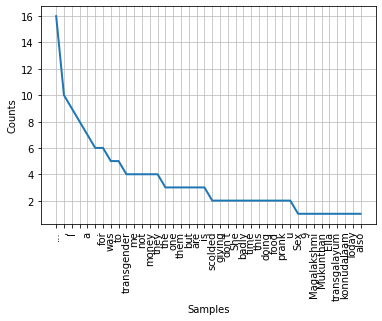

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 109 samples and 140 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[('I', 9),
 (' ', 8),
 ('transgender', 4),
 ('money', 4),
 ('one', 3),
 ('scolded', 2),
 ('giving', 2),
 ('She', 2),
 ('badly', 2),
 ('time', 2),
 ('food', 2),
 ('prank', 2),
 ('u', 2),
 ('Sex', 1),
 ('9', 1),
 ('Magalakshmi', 1),
 ('Mukunthan', 1),
 ('Ella', 1),
 ('transgalayum', 1),
 ('konnudalaam', 1),
 ('Today', 1),
 ('also', 1),
 ('Since', 1),
 ('change', 1),
 ('said', 1),
 ('Felt', 1),
 ('bad', 1),
 ('always', 1),
 ('give', 1),
 ('Thy', 1),
 ('understand', 1),
 ('us', 1),
 ('Rajeswari', 1),
 ('Rajagopalan', 1),
 (';', 1),
 ('Sister', 1),
 ('last', 1),
 ('week', 1),
 ('kicked', 1),
 ('going', 1)]

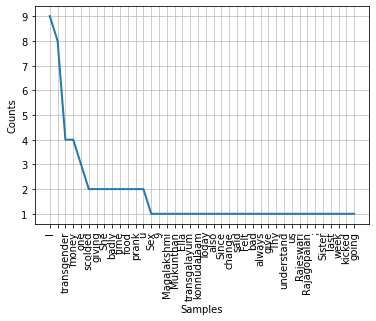

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

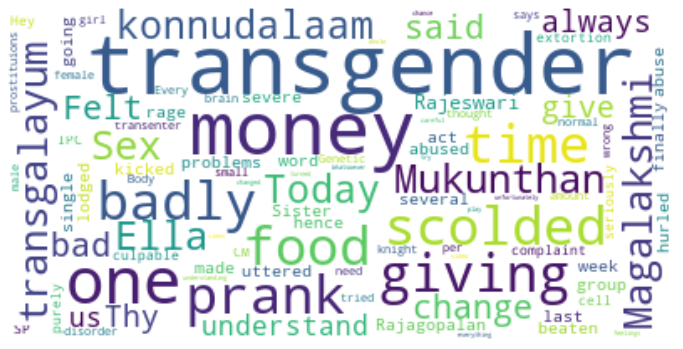

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

0
[]


In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

0


[]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


[]

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

0
[]


In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[]